<center><font size="12">HOUSE PRICE PREDICTION<font><center>

![Image](https://www.rd.com/wp-content/uploads/2017/10/Upside-Down-Houses-That-Will-Make-You-Look-Twice-courtesy-@nightrav3n-FT.jpg)

<font size="4">1. Imports.<font>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image
from IPython.core.display import HTML 
import warnings; warnings.simplefilter('ignore')

%matplotlib inline



<font size="4">2. Loading the dataset ([here](https://www.kaggle.com/harlfoxem/housesalesprediction) link to the kaggle).<font>

In [60]:
data = pd.read_csv('file:///home/lagasz/kc_house_data.csv')

<font size="4">3. Checking what this dataset has inside.<font>

In [61]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [62]:
data.shape

(21613, 21)


**Columns Descriptions:**

* id - unique ID for each home, 
* date- date when the home was sold,
* price - sales price,
* bedrooms - number of bedrooms,
* bathrooms - number of bathrooms, where .5 accounts for a room with a toilet but no shower,
* sqft_living - square footage of the apartments interior living space,
* sqft_lot - square footage of the land space,
* floors - number of floors,
* waterfront - a dummy variable for whether the apartment was overlooking the waterfront or not,
* view - an index from 0 to 4 of how good the view of the property was,
* condition - an index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average      level of construction and design, and 11-13 have a high quality level of construction and design,
* sqft_above - the square footage of the interior housing space that is above ground level,
* sqft_basement - the square footage of the interior housing space that is below ground level,
* yr_built - the year the house was initially built,
* yr_renovated - the year of the house’s last renovation,
* zipcode - what zipcode area the house is in,
* lat - lattitude,
* long - longitude,
* sqft_living15 - the square footage of interior housing living space for the nearest 15 neighbors,
* sqft_lot15 - the square footage of the land lots of the nearest 15 neighbors,



In [63]:
data = data.drop(['id', 'date'], axis = 1)

I removed that columns, because they don't be usefull to the prediction. 

In [64]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [66]:
data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

This dataset don't have the missing values.

In [67]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
      'grade', 'yr_built', 'yr_renovated']].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,3.409,7.657,1971.005,84.402
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.651,1.175,29.373,401.679
min,75000.000,0.000,0.000,290.000,520.000,1.000,1.000,1.000,1900.000,0.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,3.000,7.000,1951.000,0.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,3.000,7.000,1975.000,0.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,4.000,8.000,1997.000,0.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,5.000,13.000,2015.000,2015.000


<font size="4">Correlation<font>

Making a correlation matrix. Checking the correlation between each features.

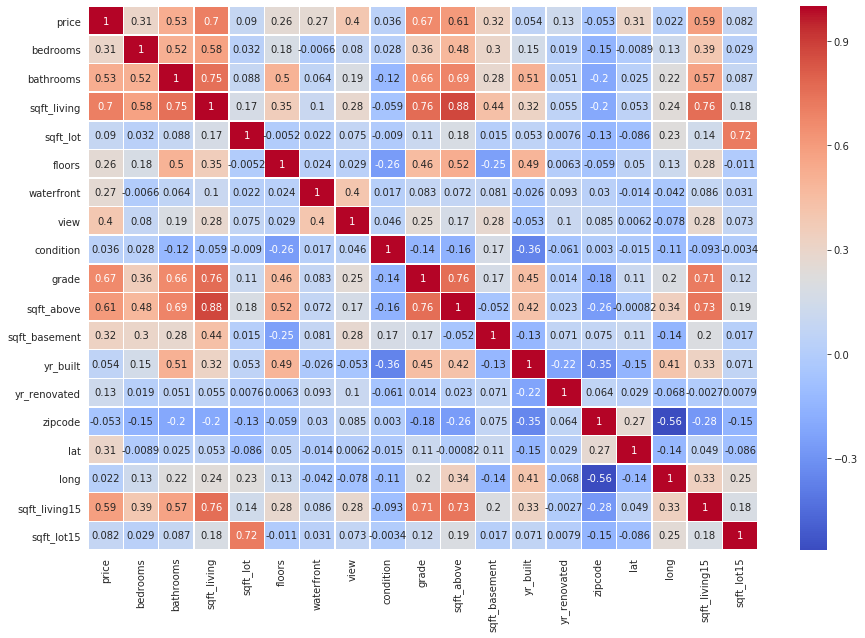

In [68]:
plt.figure(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,
            linewidths=.5, cmap='coolwarm')

Let’s see which variables have the strongest effect on our houses sale price.

In [69]:
data[data.columns[0:]].corr()['price'][:].sort_values(ascending=False)

price            1.000
sqft_living      0.702
grade            0.667
sqft_above       0.606
sqft_living15    0.585
bathrooms        0.525
view             0.397
sqft_basement    0.324
bedrooms         0.308
lat              0.307
waterfront       0.266
floors           0.257
yr_renovated     0.126
sqft_lot         0.090
sqft_lot15       0.082
yr_built         0.054
condition        0.036
long             0.022
zipcode         -0.053
Name: price, dtype: float64

Checking the relationships between price and the rest features.

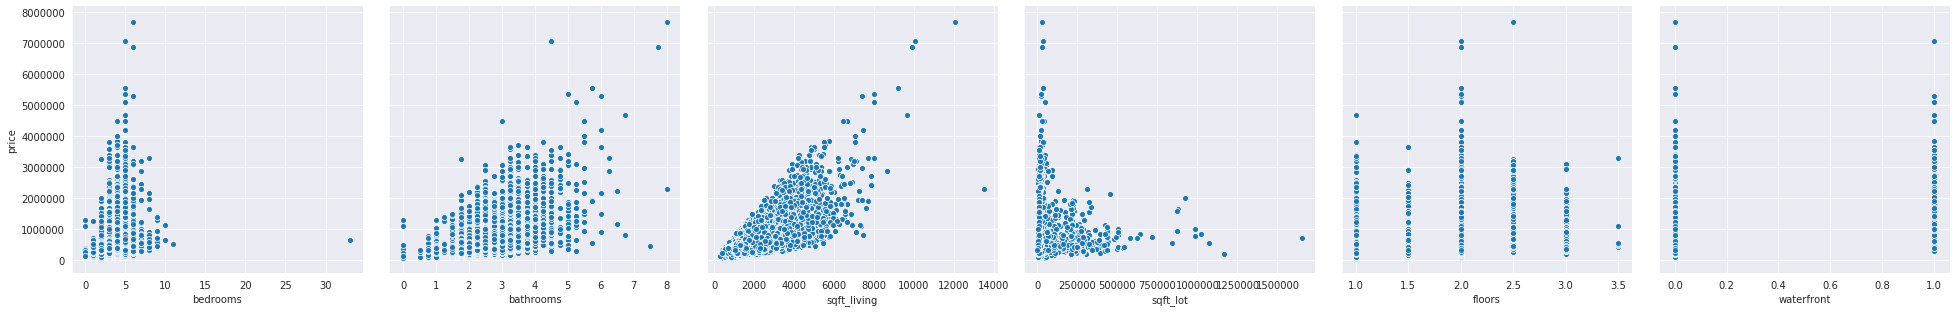

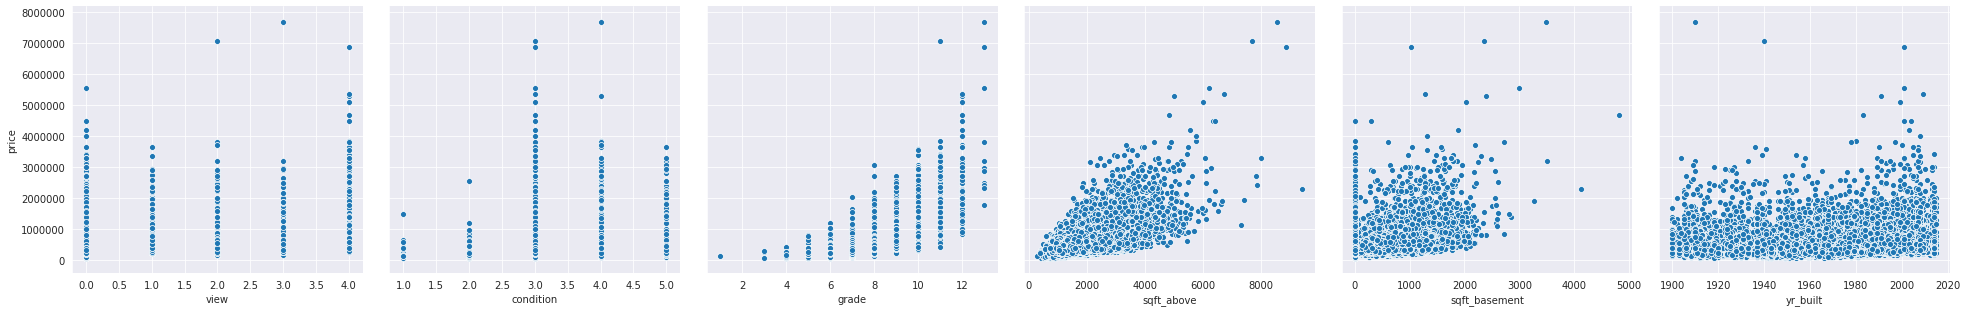

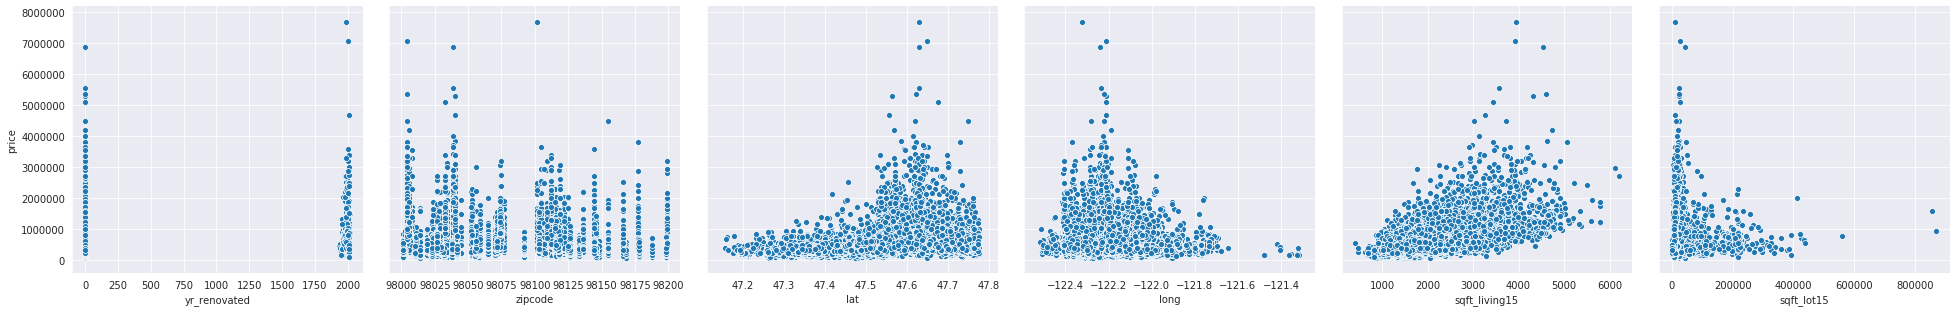

In [73]:
sns.pairplot(data, y_vars=['price'], x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'waterfront'], size=4.5)

sns.pairplot(data, y_vars=['price'], x_vars=['view', 'condition', 'grade', 'sqft_above','sqft_basement', 
'yr_built'], size=4.5)

sns.pairplot(data, y_vars=['price'], x_vars=['yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 
'sqft_lot15'], size=4.5)

sns.set_style('darkgrid')

Removing the "price" column - this isthe variable which I want to predict.

In [13]:
X = data.drop(['price'], axis=1)
y = data['price']

In [14]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [15]:
sc = preprocessing.StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
print(X_train.shape)
print(X_test.shape)

(15129, 18)
(6484, 18)


In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('LINEAR REGRESSION MAE:\t ', mean_absolute_error(y_test, lr_pred))
print('LINEAR REGRESSION MSE:\t ', mean_squared_error(y_test, lr_pred))
print('LINEAR REGRESSION R2:\t ', r2_score(y_test, lr_pred))

LINEAR REGRESSION MAE:	  125979.57435607737
LINEAR REGRESSION MSE:	  41052439526.082664
LINEAR REGRESSION R2:	  0.7073429459819418


In [19]:
xgbr = XGBRegressor(objective = 'reg:squarederror')
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
print('XGBOOST MAE:\t ', mean_absolute_error(y_test, xgbr_pred))
print('XGBOOST MSE:\t ', mean_squared_error(y_test, xgbr_pred))
print('XGBOOST R2:\t ', r2_score(y_test, xgbr_pred))

XGBOOST MAE:	  77802.02674853486
XGBOOST MSE:	  17902611773.28377
XGBOOST R2:	  0.8723748044870895


In [20]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print('RANDOM FOREST MAE:\t ',mean_absolute_error(y_test, forest_pred))
print('RANDOM FOREST MSE:\t ', mean_squared_error(y_test, forest_pred))
print('RANDOM FOREST R2:\t' , r2_score(y_test, forest_pred))

RANDOM FOREST MAE:	  74827.83833171763
RANDOM FOREST MSE:	  18917879075.637463
RANDOM FOREST R2:	 0.8651371070158123


In [21]:
n_estimators = range(10, 400, 10)
max_features = ['auto', 'sqrt']
max_depth = range(10, 200, 10)
min_samples_split = range(2, 11)
min_samples_leaf = [2, 4, 6, 8, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [22]:
forest_tuning = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
forest_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [23]:
parameters = forest_tuning.best_params_
print(parameters)

{'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 150, 'bootstrap': True}


In [24]:
forest = RandomForestRegressor(**parameters)

forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)
print('RANDOM FOREST MAE:\t ',mean_absolute_error(y_test, forest_pred))
print('RANDOM FOREST MSE:\t ', mean_squared_error(y_test, forest_pred))
print('RANDOM FOREST R2:\t' , r2_score(y_test, forest_pred))

RANDOM FOREST MAE:	  70272.05615654415
RANDOM FOREST MSE:	  17522066578.394745
RANDOM FOREST R2:	 0.8750876575341342


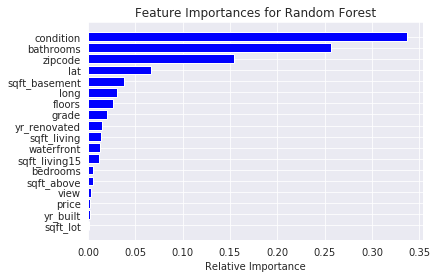

In [25]:
forest_features = data.columns.values.tolist()
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [forest_features[i] for i in indices])
plt.xlabel('Relative Importance')
sns.set_style('darkgrid')
plt.show()

Again, I will use RandomizedSearchCV to find the best hyperparameters.

In [26]:
n_estimators = range(10, 400, 10)
max_depth = range(10, 200, 10)
min_child_weight = range(10)
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight}

In [27]:
xgbr_tuning = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
xgbr_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 50.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 120.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
            

In [28]:
params = xgbr_tuning.best_params_
print(params)

{'n_estimators': 50, 'min_child_weight': 8, 'max_depth': 10}


There are the best hyperparameters. Now, let's use its in the model.

In [29]:
xgbr = XGBRegressor(objective = 'reg:squarederror', **params)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
print('XGBOOST MAE:\t ', round(mean_absolute_error(y_test, xgbr_pred), 2))
print('XGBOOST MSE:\t ', round(mean_squared_error(y_test, xgbr_pred), 2))
print('XGBOOST R2:\t ', round(r2_score(y_test, xgbr_pred), 2))

XGBOOST MAE:	  66327.91354198797
XGBOOST MSE:	  14929157820.859291
XGBOOST R2:	  0.8935721385315625


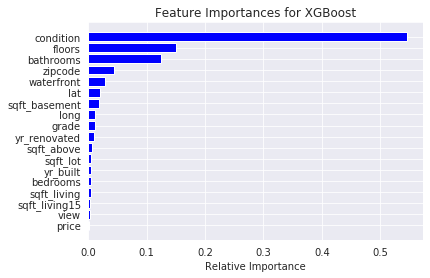

In [30]:
xgbr_features = data.columns.values.tolist()
importances = xgbr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances for XGBoost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [xgbr_features[i] for i in indices])
plt.xlabel('Relative Importance')
sns.set_style('darkgrid')
plt.show()

In [33]:
knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

In [34]:
knn_kfind = RandomizedSearchCV(estimator = knn, param_distributions = params, cv = 3)
knn_kfind.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [36]:
best_k = knn_kfind.best_params_
print(best_k)

{'n_neighbors': 7}


In [56]:
knn = neighbors.KNeighborsRegressor(**best_k)
knn.fit(X_train, y_train, )
knn_pred = knn.predict(X_test)
print('KNN MAE: ', round(mean_absolute_error(y_test, knn_pred), 2))
print('KNN MSE: ', round(mean_squared_error(y_test, knn_pred), 2))
print('KNN R2: ', round(r2_score(y_test, knn_pred), 2))

KNN MAE:  88447.91
KNN MSE:  27494829586.82
KNN R2:  0.8
